---
# Analisis Covid-19 por Región

En este notebook graficaremos la evolución del Covid-19 en las distintas regiones.

---

### Importar las librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Bajar los datos

In [2]:
df = pd.read_csv('datos-covid-por-region.csv')

### Explorar los datos

In [3]:
print("Forma del DataFrame:", df.shape)

print("\nPrimeras filas:")
display(df.head())

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nInformación general:")
df.info()

Forma del DataFrame: (4165, 3)

Primeras filas:


,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0



Estadísticas descriptivas:


,Total
count,4165.000000
mean,28240.944058
std,84613.571130
min,0.000000
25%,342.000000
50%,2842.000000
75%,11007.000000
max,513188.000000



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  4165 non-null   object 
 1   Fecha   4165 non-null   object 
 2   Total   4165 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.7+ KB


### Limpieza y validación de los datos

In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Regiones únicas
print("\nRegiones disponibles:")
print(df['Region'].unique())


# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Valores nulos por columna:
Region    0
Fecha     0
Total     0
dtype: int64

Regiones disponibles:
['Arica y Parinacota' 'Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo'
 'Valparaíso' 'Metropolitana' 'O’Higgins' 'Maule' 'Ñuble' 'Biobío'
 'Araucanía' 'Los Ríos' 'Los Lagos' 'Aysén' 'Magallanes' 'Total']

Tipos de datos:
Region     object
Fecha      object
Total     float64
dtype: object


In [6]:
# Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Verificar el rango de fechasprint("Rango de fechas:") usando funcion min y max
print(f"Desde: {df['Fecha'].min()}")
print(f"Hasta: {df['Fecha'].max()}")

Desde: 2020-03-03 00:00:00
Hasta: 2020-11-02 00:00:00


In [8]:
# Verificar datos de Total por región

print("Estadísticas de Total por región:")
print(df.groupby('Region')['Total'].describe())

# Últimos datos por región
print("\nÚltimos datos por región:")
ultimos_datos = df.groupby('Region')['Fecha'].max()
print(ultimos_datos)

Estadísticas de Total por región:
                    count           mean            std  min      25%  \
Region                                                                  
Antofagasta         245.0    9652.187755    8310.135676  0.0    740.0   
Araucanía           245.0    3807.897959    3157.036454  0.0   1328.0   
Arica y Parinacota  245.0    3415.555102    3396.480693  0.0    308.0   
Atacama             245.0    2662.706122    2931.634881  0.0     67.0   
Aysén               245.0     159.224490     272.559834  0.0      7.0   
Biobío              245.0    9792.106122    9673.115175  0.0    759.0   
Coquimbo            245.0    4905.073469    4886.524594  0.0     88.0   
Los Lagos           245.0    3911.665306    4241.746080  0.0    517.0   
Los Ríos            245.0     886.334694     876.498989  0.0    198.0   
Magallanes          245.0    3025.159184    3626.553683  0.0    777.0   
Maule               245.0    6837.024490    6418.539615  1.0    397.0   
Metropolitana    

### Fije el estilo bmh para los gráficos

In [12]:
# Fijar el estilo bmh para los gráficos
plt.style.use('bmh')

### Haga un gráfico que contenga la evolución del Covid-19 en Arica y Parinacota

- fije tamaño de la figura 12 x 4
- personalice color de linea #FF9900, ancho 2, linea punteada

In [14]:
# Filtrar datos para Arica y Parinacota

arica_data = df[df['Region'] == 'Arica y Parinacota']
print(arica_data.head())
print(f"Datos de Arica y Parinacota: {len(arica_data)} registros")

                Region      Fecha  Total
0   Arica y Parinacota 2020-03-03    0.0
17  Arica y Parinacota 2020-03-04    0.0
34  Arica y Parinacota 2020-03-05    0.0
51  Arica y Parinacota 2020-03-06    0.0
68  Arica y Parinacota 2020-03-07    0.0
Datos de Arica y Parinacota: 245 registros


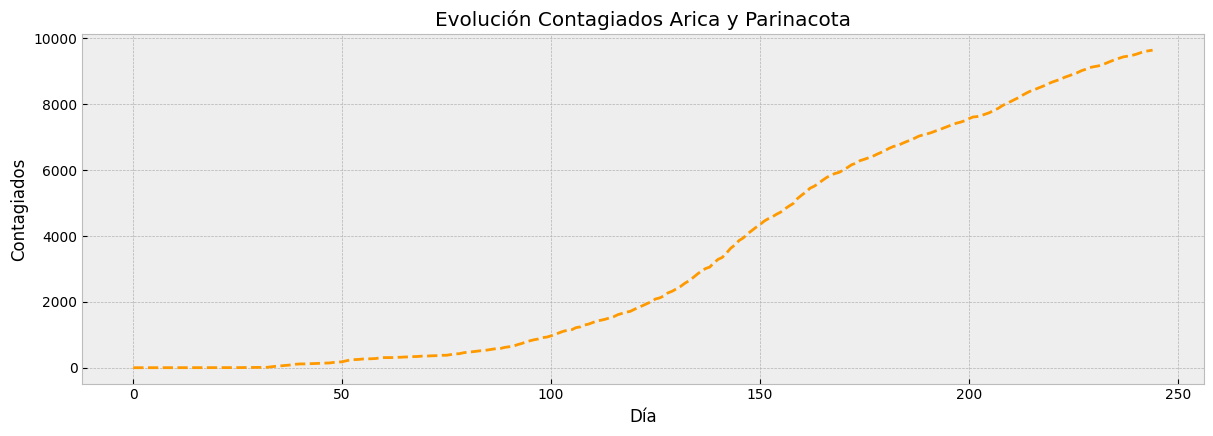

In [21]:
# Filtrar datos para Arica y Parinacota
arica_data = df[df['Region'] == 'Arica y Parinacota'].copy()

# Calcular el número de días desde el inicio
arica_data['Día'] = (arica_data['Fecha'] - arica_data['Fecha'].min()).dt.days

# Gráfico evolución COVID-19 en Arica y Parinacota
plt.figure(figsize=(12, 4))

plt.plot(arica_data['Día'], arica_data['Total'], color='#FF9900', linewidth=2, linestyle='--')
plt.tight_layout()
# plt.xticks(rotation=45) # No needed for day numbers
plt.title('Evolución Contagiados Arica y Parinacota')
plt.grid(True)
plt.xlabel('Día')
plt.ylabel('Contagiados')

plt.show()

Text(0.5, 1.0, 'Evolución Contagiados Arica y Parinacota')

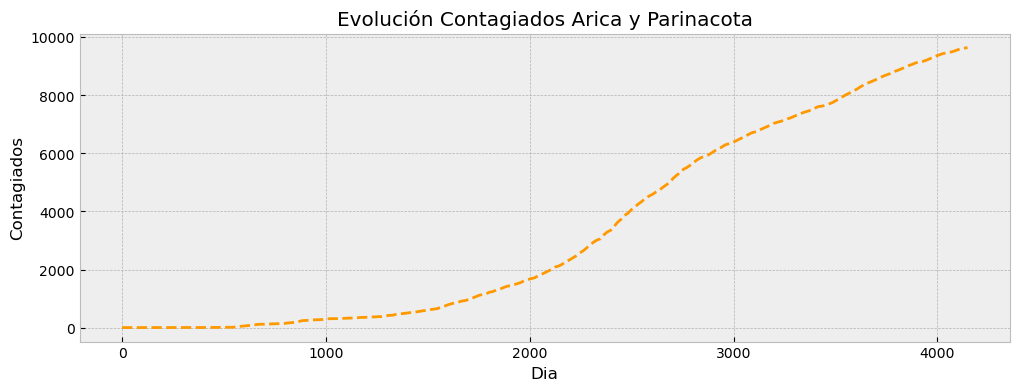

### Haga un gráfico donde compare la evolución de las principales 3 regiones del país

In [22]:
# Identificar las 3 regiones con mayor total de casos
# Filtrar la fila 'Total' que es un agregado, no una región
df_regiones = df[df['Region'] != 'Total']

casos_por_region = df_regiones.groupby('Region')['Total'].max().sort_values(ascending=False)

top3_regiones = casos_por_region.head(3)  # Filtrar datos para las 3 principales regiones
top3_names = top3_regiones.index.tolist()

print("Top 3 regiones con más casos:")
print(top3_regiones)
print(f"\nRegiones seleccionadas: {top3_names}")

Top 3 regiones con más casos:
Region
Metropolitana    297423.0
Valparaíso        30498.0
Biobío            29931.0
Name: Total, dtype: float64

Regiones seleccionadas: ['Metropolitana', 'Valparaíso', 'Biobío']


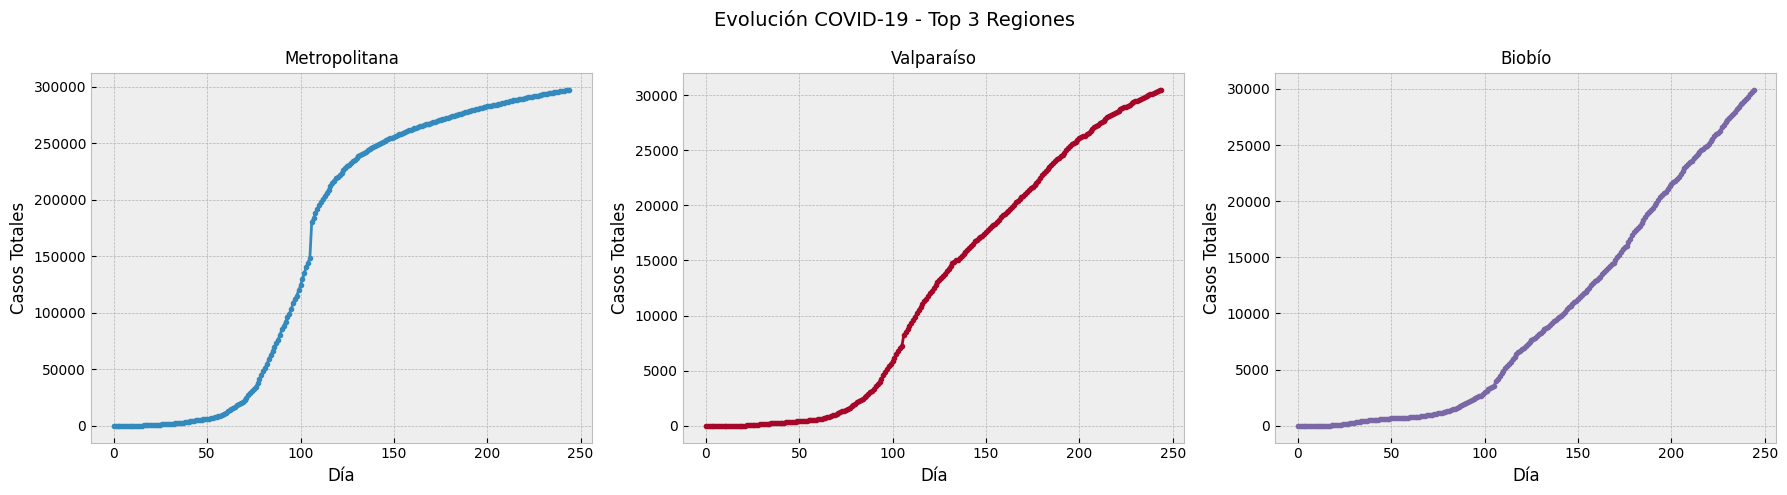

In [25]:
# Identificar las 3 regiones con mayor total de casos
# Filtrar la fila 'Total' que es un agregado, no una región
df_regiones = df[df['Region'] != 'Total'].copy()

# Calcular el número de días desde el inicio para df_regiones
df_regiones['Día'] = (df_regiones['Fecha'] - df_regiones['Fecha'].min()).dt.days

casos_por_region = df_regiones.groupby('Region')['Total'].max().sort_values(ascending=False)

top3_regiones = casos_por_region.head(3)
top3_names = top3_regiones.index.tolist()

# Gráfico comparativo de las 3 principales regiones (separados en subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, region in enumerate(top3_names):
    region_data = df_regiones[df_regiones['Region'] == region]
    axes[i].plot(region_data['Día'], region_data['Total'],
                 color=f'C{i}', linewidth=2, marker='o', markersize=3)
    axes[i].set_title(f'{region}', fontsize=12)
    axes[i].set_xlabel('Día')
    axes[i].set_ylabel('Casos Totales')
    axes[i].grid(True)
    # axes[i].tick_params(axis='x', rotation=45) # No needed for day numbers

plt.suptitle('Evolución COVID-19 - Top 3 Regiones', fontsize=14)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Biobío')

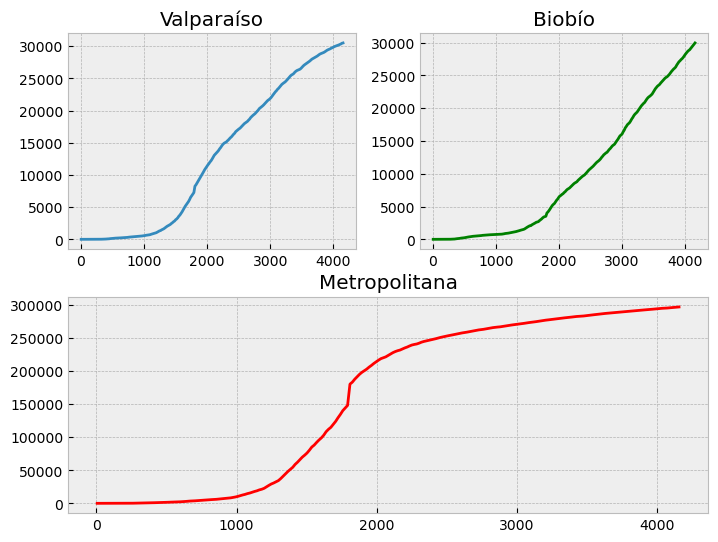

### Haga un gráfico que contenga las curvas de todas las regiones excepto la región metropolitana

In [26]:
# Filtrar todas las regiones excepto la Metropolitana y Total

regiones_sin_metro = df_regiones[(df_regiones['Region'] != 'Metropolitana') & (df_regiones['Region'] != 'Total')]
regiones_disponibles = regiones_sin_metro['Region'].unique()
print(f"Regiones a graficar (sin Metropolitana): {len(regiones_disponibles)}")
print(regiones_disponibles)

Regiones a graficar (sin Metropolitana): 15
['Arica y Parinacota' 'Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo'
 'Valparaíso' 'O’Higgins' 'Maule' 'Ñuble' 'Biobío' 'Araucanía' 'Los Ríos'
 'Los Lagos' 'Aysén' 'Magallanes']


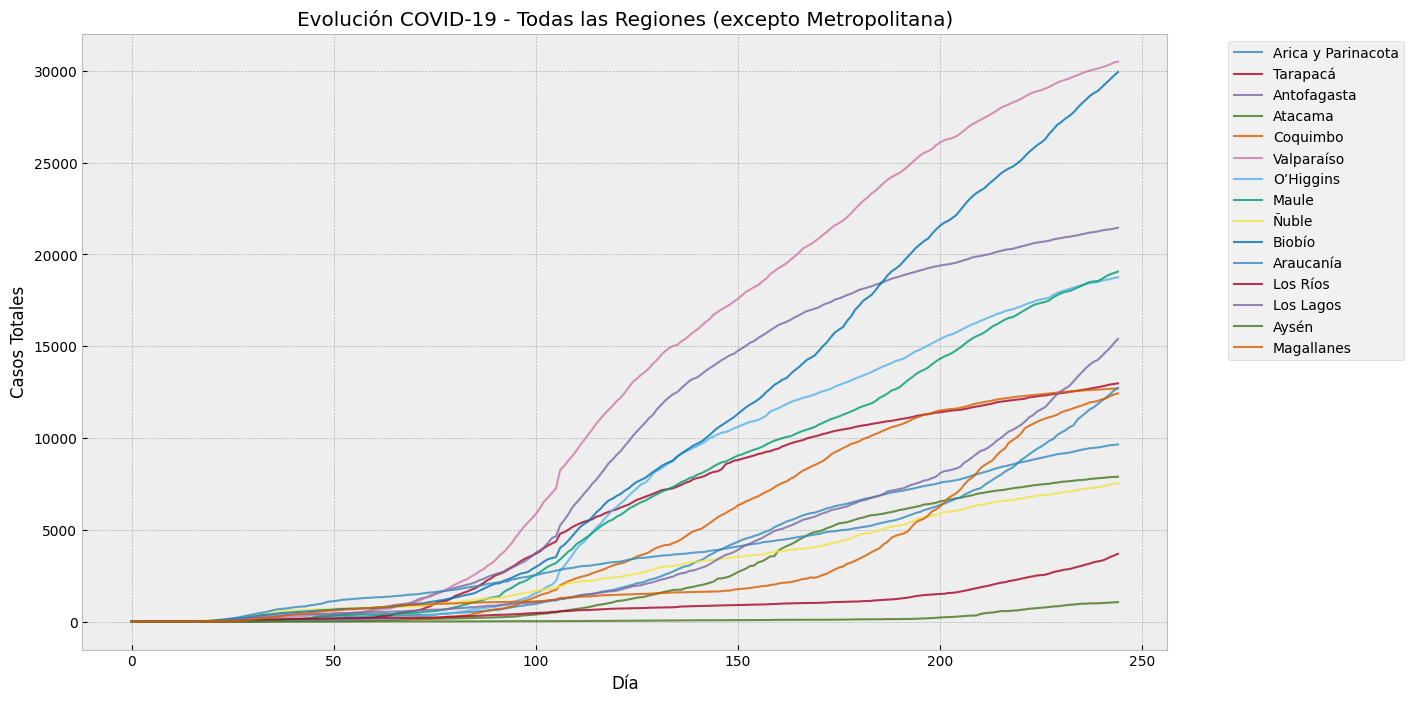

In [29]:
# Gráfico con todas las regiones excepto la Metropolitana

plt.figure(figsize=(14, 8))
plt.tight_layout()

for region in regiones_disponibles:
    region_data = regiones_sin_metro[regiones_sin_metro['Region'] == region]
    plt.plot(region_data['Día'], region_data['Total'],
             label=region, linewidth=1.5, alpha=0.8)

# plt.xticks(rotation=45) # No needed for day numbers if 'Día' is numeric
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Casos Totales')
plt.xlabel('Día')
plt.title('Evolución COVID-19 - Todas las Regiones (excepto Metropolitana)')
plt.show()

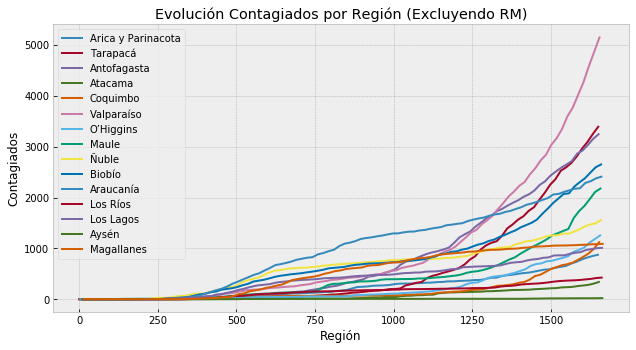

### Haga un gráfico compuesto por sub-gráficos de la evolución de los contagios en cada región

In [30]:
# Preparar datos para subgráficos

todas_regiones = df_regiones['Region'].unique()
n_regiones = len(todas_regiones)
print(f"Total de regiones: {n_regiones}")
print(f"Regiones: {todas_regiones}")

# Calcular dimensiones de la grilla
n_cols = 4
n_rows = (n_regiones + n_cols - 1) // n_cols
print(f"Grilla: {n_rows} filas x {n_cols} columnas")


Total de regiones: 16
Regiones: ['Arica y Parinacota' 'Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo'
 'Valparaíso' 'Metropolitana' 'O’Higgins' 'Maule' 'Ñuble' 'Biobío'
 'Araucanía' 'Los Ríos' 'Los Lagos' 'Aysén' 'Magallanes']
Grilla: 4 filas x 4 columnas


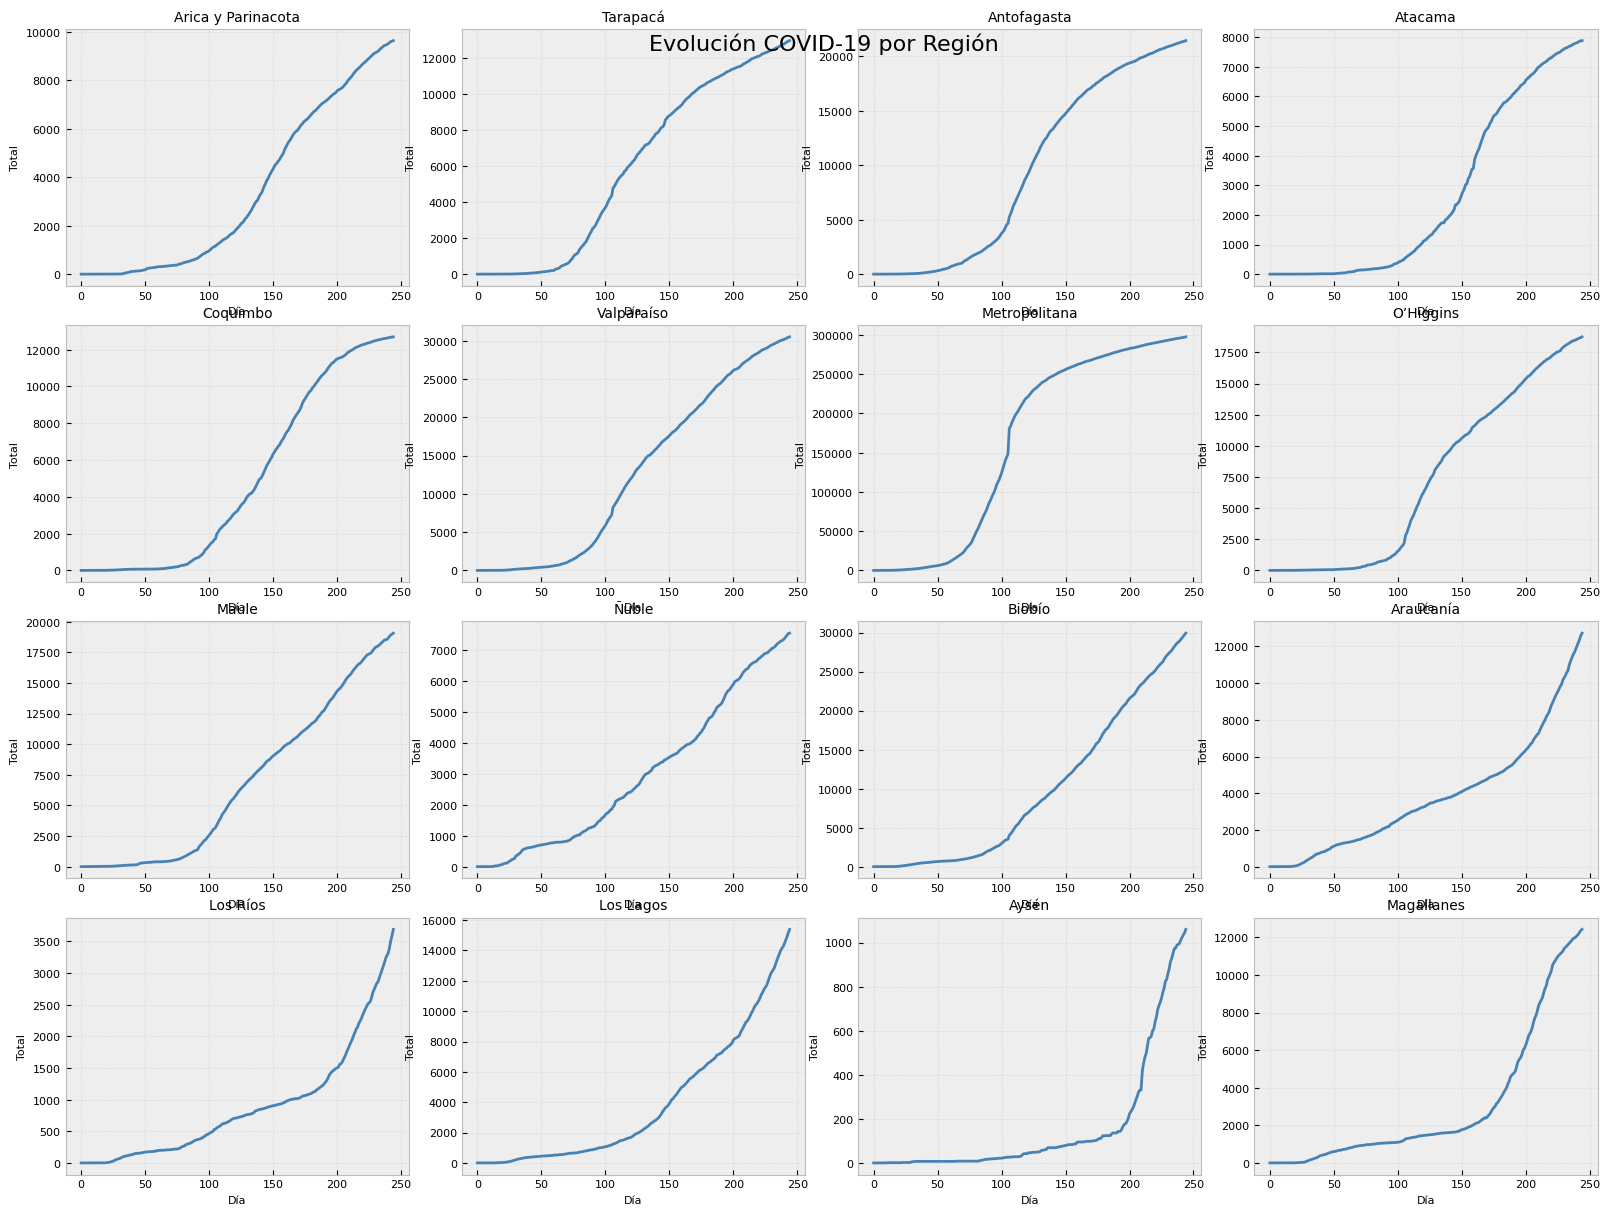

In [32]:
# Crear subgráficos para cada región

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
axes = axes.flatten() if n_regiones > 1 else [axes]
plt.tight_layout()
plt.suptitle('Evolución COVID-19 por Región', fontsize=16)

for i, region in enumerate(todas_regiones):
    region_data = df_regiones[df_regiones['Region'] == region]
    axes[i].plot(region_data['Día'], region_data['Total'],
                 color='steelblue', linewidth=2)
    axes[i].set_title(f'{region}', fontsize=10)
    axes[i].set_xlabel('Día', fontsize=8) # Added xlabel for clarity
    axes[i].set_ylabel('Total', fontsize=8) # Added ylabel for clarity
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].tick_params(axis='x', labelsize=8)

# Ocultar subgráficos vacíos
for i in range(n_regiones, len(axes)):
    axes[i].set_visible(False)

plt.show()

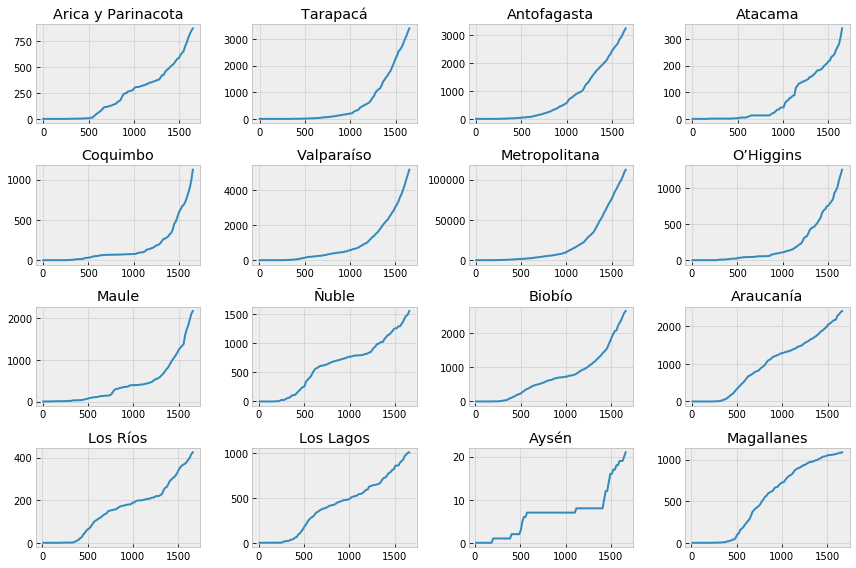

#### Haga un gráfico de torta con los contagios por región utilizando los datos del último día de medición

In [36]:
# Obtener datos del último día por región

ultimo_dia = df_regiones['Fecha'].max()
print(f"Último día de medición: {ultimo_dia}")

# Datos del último día para cada región
datos_ultimo_dia = df_regiones[df_regiones['Fecha'] == ultimo_dia]
print(f"\nCasos por región al {ultimo_dia}:")
display(datos_ultimo_dia[['Region', 'Total']].sort_values('Total', ascending=False))

Último día de medición: 2020-11-02 00:00:00

Casos por región al 2020-11-02 00:00:00:


,Region,Total
4154,Metropolitana,297423.0
4153,Valparaíso,30498.0
4158,Biobío,29931.0
4150,Antofagasta,21447.0
4156,Maule,19061.0
4155,O’Higgins,18749.0
4161,Los Lagos,15391.0
4149,Tarapacá,12973.0
4159,Araucanía,12726.0
4152,Coquimbo,12698.0


,Region,Fecha,Total
1649,Arica y Parinacota,2020-06-08,874
1650,Tarapacá,2020-06-08,3392
1651,Antofagasta,2020-06-08,3245
1652,Atacama,2020-06-08,339
1653,Coquimbo,2020-06-08,1123
1654,Valparaíso,2020-06-08,5149
1655,Metropolitana,2020-06-08,112136
1656,O’Higgins,2020-06-08,1255
1657,Maule,2020-06-08,2176
1658,Ñuble,2020-06-08,1552


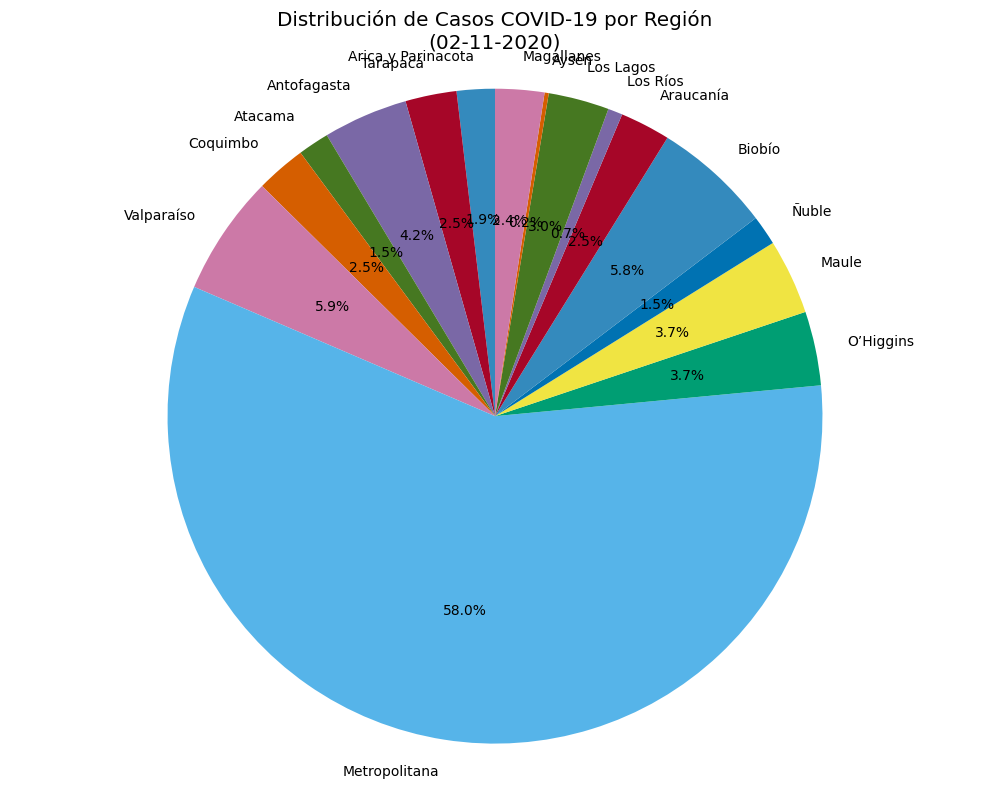

In [37]:
# Gráfico de torta con contagios por región (último día)

plt.figure(figsize=(10, 8))

# Preparar datos para la torta
labels = datos_ultimo_dia['Region']
sizes = datos_ultimo_dia['Total']

# Crear el gráfico de torta
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que la torta sea circular
plt.title(f'Distribución de Casos COVID-19 por Región\n({ultimo_dia.strftime("%d-%m-%Y")})')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Contagiados por Región')

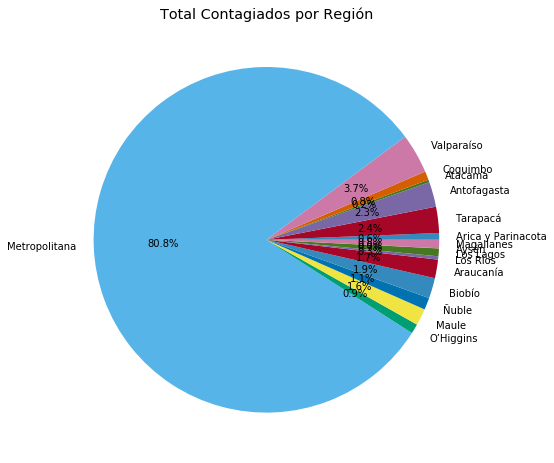

### Haga un gráfico de barras donde muestre todas las regiones excepto la metropolitana y los datos correspondan a los más recientes

In [38]:
# Datos más recientes excluyendo región Metropolitana

datos_sin_metro = datos_ultimo_dia[datos_ultimo_dia['Region'] != 'Metropolitana']
print(datos_sin_metro[['Region', 'Total']])

datos_sin_metro = datos_sin_metro.sort_values('Total', ascending=False)
print(f"Datos para gráfico de barras (sin Metropolitana):")

                  Region    Total
4148  Arica y Parinacota   9644.0
4149            Tarapacá  12973.0
4150         Antofagasta  21447.0
4151             Atacama   7887.0
4152            Coquimbo  12698.0
4153          Valparaíso  30498.0
4155           O’Higgins  18749.0
4156               Maule  19061.0
4157               Ñuble   7534.0
4158              Biobío  29931.0
4159           Araucanía  12726.0
4160            Los Ríos   3690.0
4161           Los Lagos  15391.0
4162               Aysén   1060.0
4163          Magallanes  12427.0
Datos para gráfico de barras (sin Metropolitana):


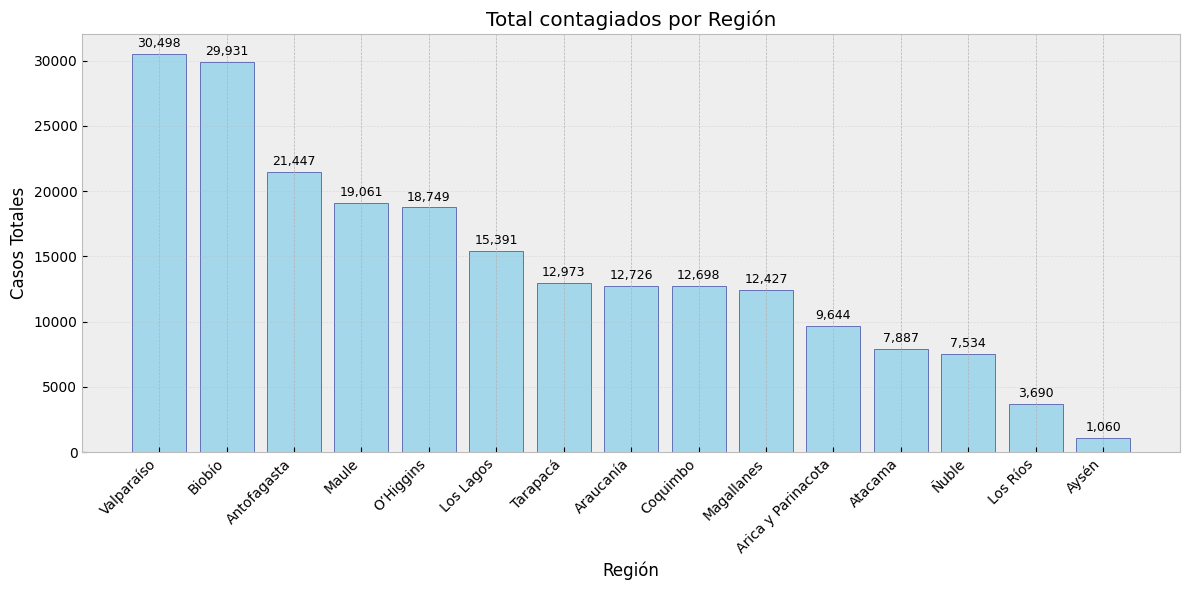

In [44]:
# Gráfico de barras (sin región Metropolitana)

plt.figure(figsize=(12, 6))
plt.bar(
    datos_sin_metro['Region'],
    datos_sin_metro['Total'],
    color='skyblue',
    edgecolor='navy',
    alpha=0.7
)

# Agregar valores sobre las barras
for i, v in enumerate(datos_sin_metro['Total']):
    plt.text(
        i,
        v + max(datos_sin_metro['Total']) * 0.01,
        f'{int(v):,}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title(f'Total contagiados por Región')
plt.xlabel('Región')
plt.ylabel('Casos Totales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Contagiados por Región')

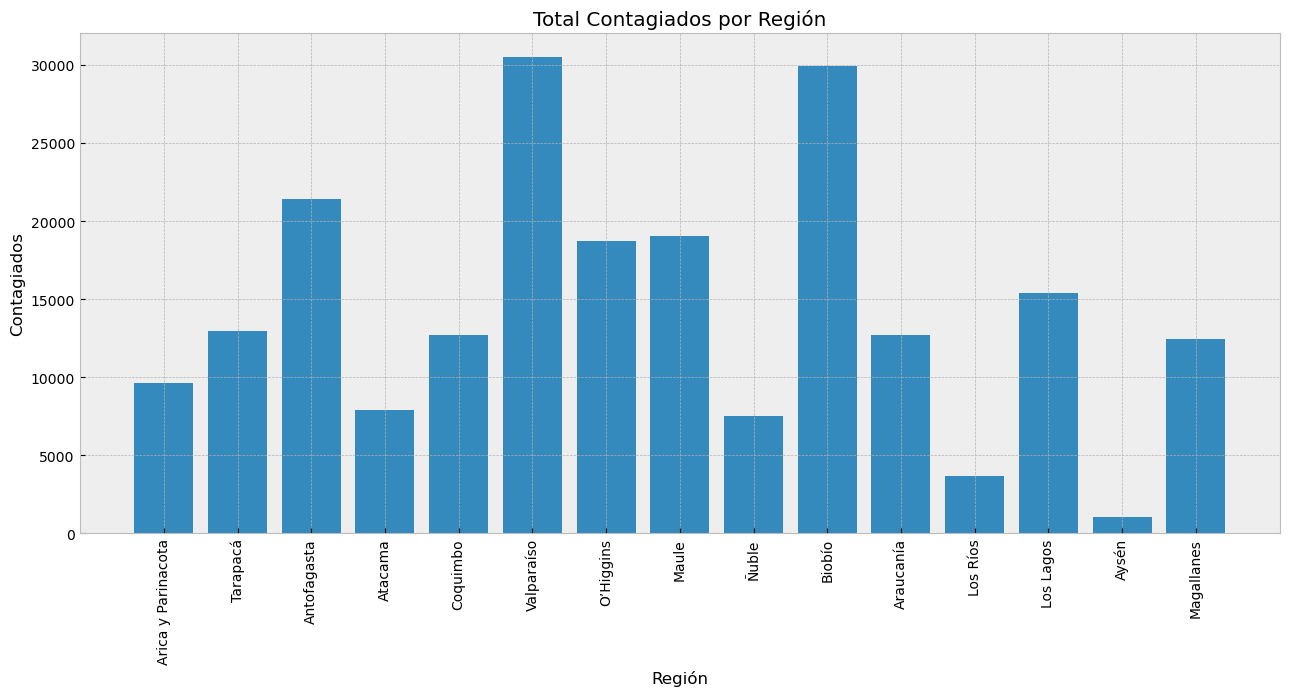

---